In [1]:
import ROOT
import numpy as np
from array import array as ary
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter
import datetime
import seaborn as sns 

Welcome to JupyROOT 6.20/04


In [2]:
df_stat = pd.read_csv('GR-percetile-per-question.csv',skipinitialspace=True)
df_stat = df_stat.rename(columns = {'Unnamed: 0':'Question'})
df_stat.set_index("Question" , inplace=True)
df_stat = df_stat.astype(float)
df_stat

,GR1777,GR0877,GR0177,GR9677,GR9277,GR8677
Question,,,,,,
1,92.0,72.0,54.0,73.0,69.0,67.0
2,41.0,88.0,30.0,29.0,39.0,51.0
3,70.0,60.0,71.0,55.0,31.0,55.0
4,64.0,72.0,62.0,34.0,97.0,55.0
5,30.0,94.0,28.0,29.0,42.0,19.0
...,...,...,...,...,...,...
96,34.0,17.0,13.0,28.0,16.0,23.0
97,52.0,20.0,20.0,11.0,9.0,17.0
98,22.0,49.0,72.0,39.0,19.0,46.0


In [3]:
list_series = []
list_leg = []
for column in df_stat.columns:
    list_series.append(df_stat[column].tolist())
    list_leg.append(column)

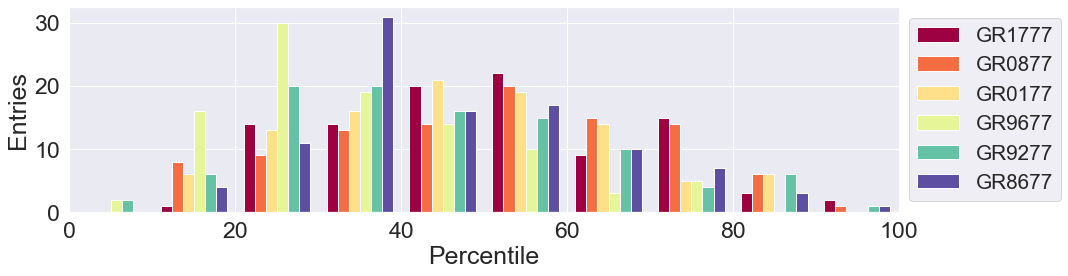

In [62]:
sns.set()

dims = (15,4)
fig, ax = plt.subplots(figsize=dims)

colormap = plt.cm.get_cmap('Spectral') # reverse the colormap --> 'YlGnBu_r'
plt.gca().set_prop_cycle(plt.cycler('color', colormap(np.linspace(0, 1, len(list_leg)))))

plt.hist(list_series, bins=10, range=[0,100])
ax.set_xlabel('Percentile',fontsize=25)
ax.set_ylabel('Entries', fontsize=25)
ax.tick_params(axis='x', labelsize=23)
ax.tick_params(axis='y', labelsize=23)
ax.set_xlim([0,100])
plt.legend(list_leg, loc='center left', bbox_to_anchor=(1, 0.5),fontsize='xx-large')

plt.tight_layout()
plt.savefig('./plot/GR-Percentile-hist.png',dpi=500)
plt.savefig('./plot/GR-Percentile-hist.pdf')
plt.show()

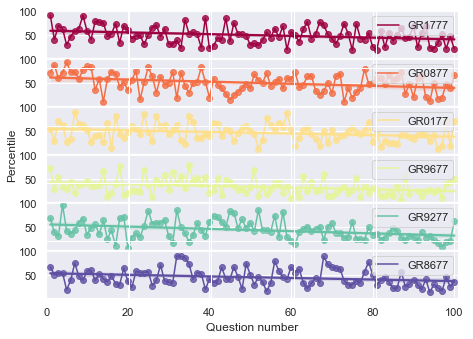

In [40]:
# sns.reset_orig()
x = np.linspace(1, 100, 100)

evenly_spaced_interval = np.linspace(0, 1, len(list_leg))
colors = [plt.cm.Spectral(x) for x in evenly_spaced_interval]

fig, axes = plt.subplots(len(list_leg),figsize=(7,5), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.add_subplot(111, frameon=False)

for i, color in enumerate(colors):
    axes[i].plot(x, list_series[i], color=color)
    axes[i].set(xlim=(0, 101))
    axes[i].legend((list_leg[i],),loc='upper right')
    sns.regplot(x, list_series[i],ax=axes[i], color=color)
    axes[i].grid(True)

plt.tight_layout()
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Question number')
plt.ylabel('Percentile')

plt.savefig('./plot/GR-Percentile-line.png',dpi=500)
plt.savefig('./plot/GR-Percentile-line.pdf')
plt.show()


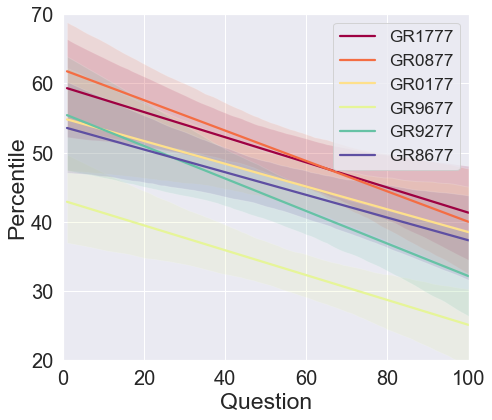

In [72]:
dims = (7,6)

fig, ax = plt.subplots(figsize=dims)
colormap = plt.cm.get_cmap('Spectral') # reverse the colormap --> 'YlGnBu_r'
plt.gca().set_prop_cycle(plt.cycler('color', colormap(np.linspace(0, 1, len(list_leg)))))

for ilist in range(len(list_leg)):
    sns.regplot(x, list_series[ilist], scatter_kws={'s':0})
    
ax.set_xlabel('Question',fontsize=23)
ax.set_ylabel('Percentile', fontsize=23)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim([0,100])
ax.set_ylim([20,70])
plt.legend(list_leg, loc='best',fontsize='x-large')

plt.tight_layout()
plt.savefig('./plot/GR-Percentile-regplot-onlyfit.png',dpi=500)
plt.savefig('./plot/GR-Percentile-regplot-onlyfit.pdf')
plt.show()

In [74]:
import joypy

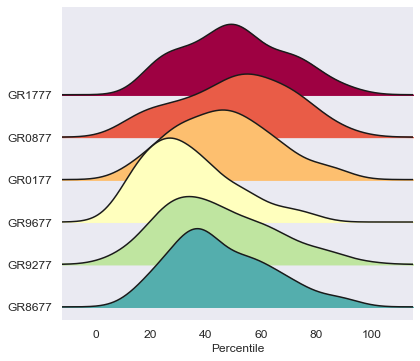

In [75]:
# sns.reset_orig()
fig, axes = joypy.joyplot(df_stat,colormap=plt.cm.Spectral, figsize=(6,5))
ax = axes[-1]
ax.set_xlabel('Percentile')
# ax.tick_params(axis='x', labelsize=23)
ax.xaxis.set_visible(True)

ax.yaxis.set_ticks([])

# plt.tight_layout()
plt.savefig('./plot/GR-Percentile-joyplot.png',dpi=500)
plt.savefig('./plot/GR-Percentile-joyplot.pdf')
plt.show()